In [92]:
#  PASO 1: Exploración de Datos (EDA) – Enfoque en ANN para predecir el tiempo de entrega
# 1.1 Carga del dataset
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Leer el archivo CSV
ruta = '/content/drive/MyDrive/TESIS_1/tiempodataset.csv'
data = pd.read_csv(ruta)
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [93]:
# 1.2 Revisión general
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   3000 non-null   object 
 1   Date                            3000 non-null   object 
 2   Product Type                    3000 non-null   object 
 3   Machine ID                      3000 non-null   int64  
 4   Shift                           3000 non-null   object 
 5   Units Produced                  3000 non-null   int64  
 6   Defects                         2701 non-null   float64
 7   Production Time Hours           3000 non-null   float64
 8   Material Cost Per Unit          3000 non-null   float64
 9   Labour Cost Per Hour            3000 non-null   float64
 10  Energy Consumption kWh          3000 non-null   float64
 11  Operator Count                  3000 non-null   int64  
 12  Maintenance Hours               27

,0
Production ID,0
Date,0
Product Type,0
Machine ID,0
Shift,0
Units Produced,0
Defects,299
Production Time Hours,0
Material Cost Per Unit,0
Labour Cost Per Hour,0


In [94]:
# 1.3 Conversión y eliminación preliminar
# Convertir 'Date' a datetime
data['Date'] = pd.to_datetime(data['Date'])

# Eliminar columna innecesaria para el modelo
data = data.drop(columns=['Production ID'])


In [95]:
# Ver cuántos valores nulos hay
print(data.isnull().sum())

# Ver el porcentaje de nulos por columna
print((data.isnull().sum() / len(data)) * 100)


Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64
Date                               0.000000
Product Type                       0.000000
Machine ID                         0.000000
Shift                              0.000000
Units Produced                     0.000000
Defects                            9.966667
P

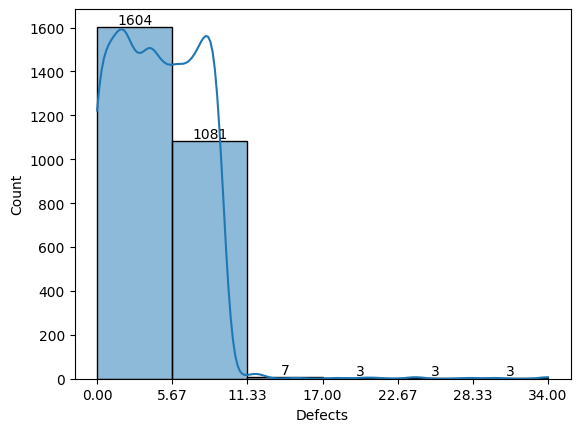

In [96]:
# 1.4 Imputación de valores nulos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax=sns.histplot(data.Defects,bins=6,kde=True)
#for g in ax.axes.flat
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(data.Defects.min(),data.Defects.max()+1,(data.Defects.max()-data.Defects.min())/6))
plt.show()


In [97]:
data.Defects.mean(),data.Defects.median(),data.Defects.mode()




(np.float64(4.612736023694928),
 4.0,
 0    9.0
 Name: Defects, dtype: float64)

In [98]:
data.dropna(subset='Defects',inplace=True)
data.isna().sum()

,0
Date,0
Product Type,0
Machine ID,0
Shift,0
Units Produced,0
Defects,0
Production Time Hours,0
Material Cost Per Unit,0
Labour Cost Per Hour,0
Energy Consumption kWh,0


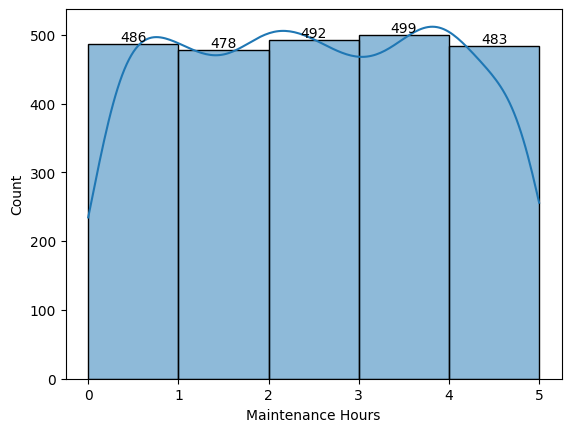

In [99]:
ax=sns.histplot(data['Maintenance Hours'],bins=5,kde=True)
#for g in ax.axes.flat
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(data['Maintenance Hours'].min(),data['Maintenance Hours'].max()+1,(data['Maintenance Hours'].max()-data['Maintenance Hours'].min())/5))
plt.show()

In [100]:
data['Maintenance Hours'].mean(),data['Maintenance Hours'].median(),data['Maintenance Hours'].mode()


(np.float64(2.5068416735028713),
 2.49,
 0    2.10
 1    3.88
 2    4.10
 3    4.62
 Name: Maintenance Hours, dtype: float64)

In [101]:
data.dropna(subset='Maintenance Hours',inplace=True)
data.isna().sum()


,0
Date,0
Product Type,0
Machine ID,0
Shift,0
Units Produced,0
Defects,0
Production Time Hours,0
Material Cost Per Unit,0
Labour Cost Per Hour,0
Energy Consumption kWh,0


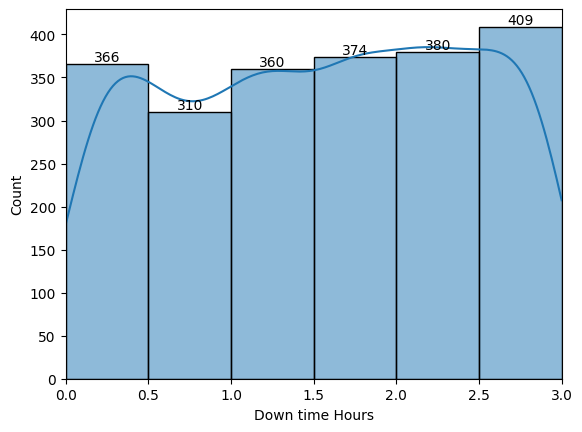

In [102]:
ax=sns.histplot(data['Down time Hours'],bins=6,kde=True)
#for g in ax.axes.flat
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(data['Down time Hours'].min(),data['Down time Hours'].max()+1,(data['Down time Hours'].max()-data['Down time Hours'].min())/6))
plt.xlim(data['Down time Hours'].min(),data['Down time Hours'].max())
plt.show()


In [103]:
data['Down time Hours'].mean(),data['Down time Hours'].median(),data['Down time Hours'].mode()


(np.float64(1.5459936334697588),
 1.59,
 0    2.64
 Name: Down time Hours, dtype: float64)

In [104]:
data.dropna(subset='Down time Hours',inplace=True)
data.isna().sum()


,0
Date,0
Product Type,0
Machine ID,0
Shift,0
Units Produced,0
Defects,0
Production Time Hours,0
Material Cost Per Unit,0
Labour Cost Per Hour,0
Energy Consumption kWh,0


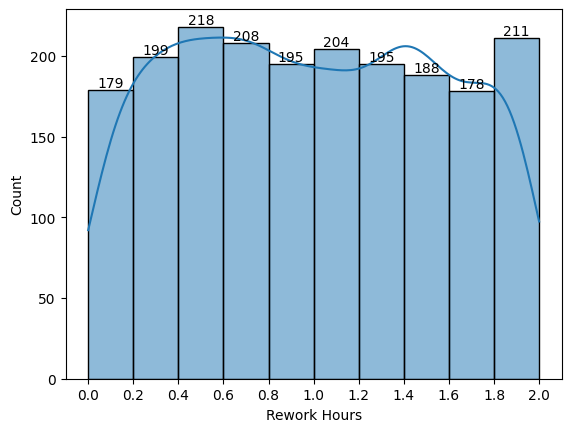

In [105]:
ax=sns.histplot(data['Rework Hours'],bins=10,kde=True)
#for g in ax.axes.flat
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(data['Rework Hours'].min(),data['Rework Hours'].max()+0.1,(data['Rework Hours'].max()-data['Rework Hours'].min())/10))
plt.show()

In [106]:
data['Rework Hours'].mean(),data['Rework Hours'].median(),data['Rework Hours'].mode()


(np.float64(0.9938278481012658),
 0.99,
 0    0.09
 1    0.90
 2    1.83
 Name: Rework Hours, dtype: float64)

In [107]:
data.dropna(subset='Rework Hours',inplace=True)
data.isna().sum()


,0
Date,0
Product Type,0
Machine ID,0
Shift,0
Units Produced,0
Defects,0
Production Time Hours,0
Material Cost Per Unit,0
Labour Cost Per Hour,0
Energy Consumption kWh,0


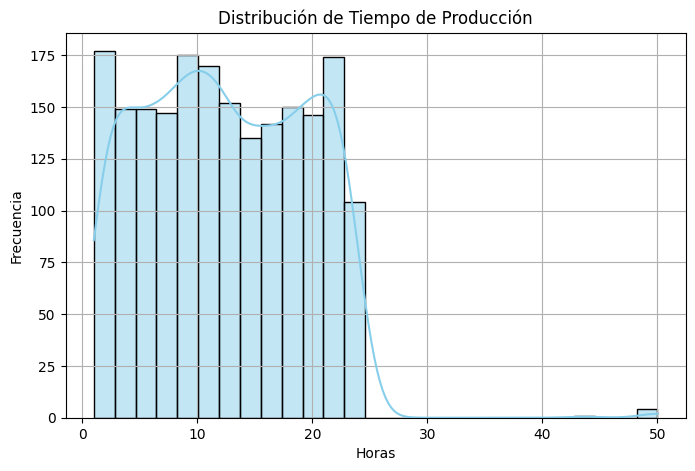

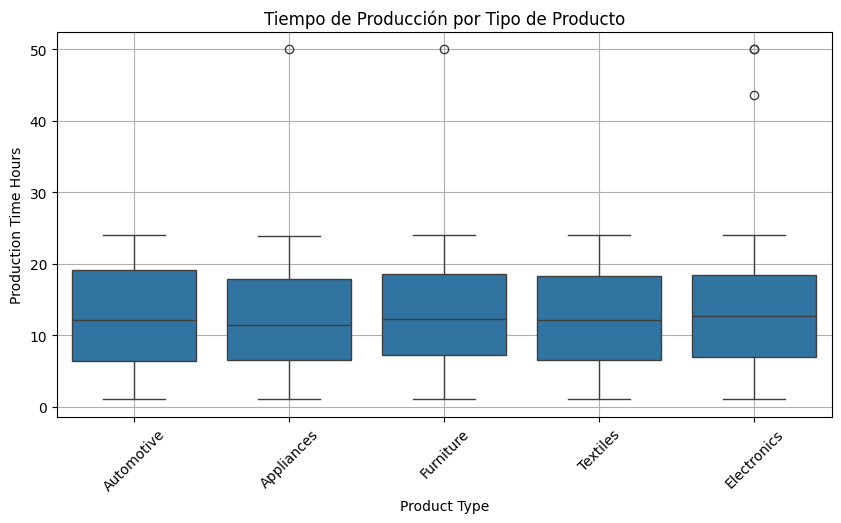

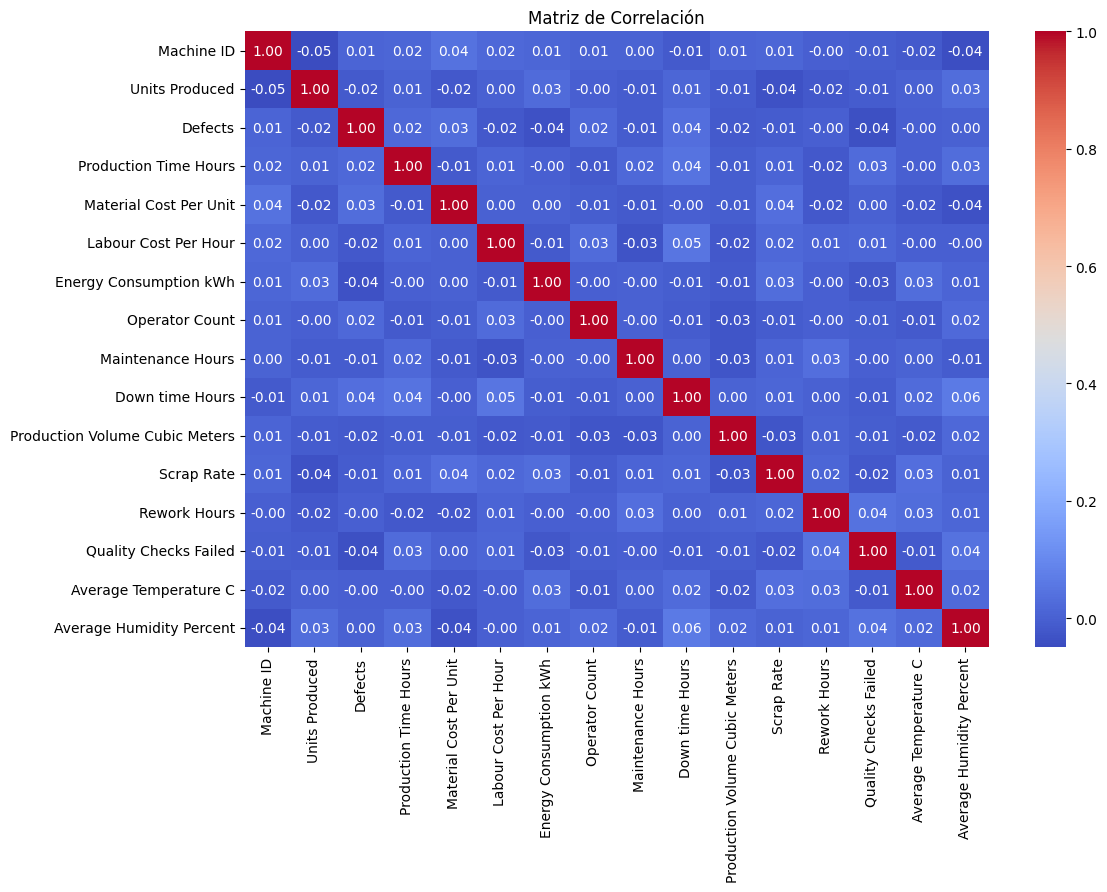

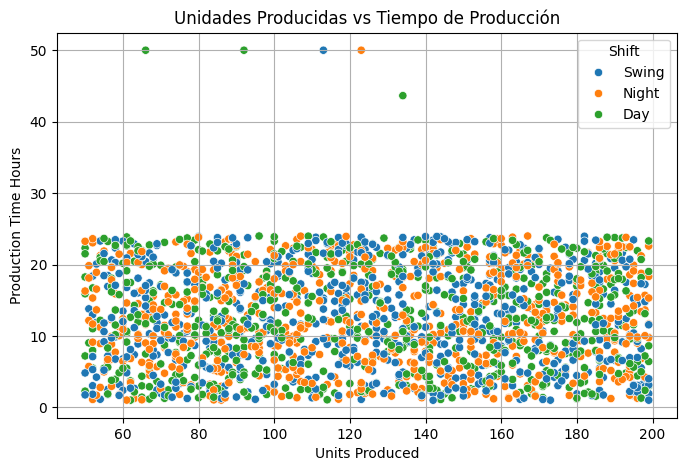

In [108]:
# 1.6 Visualización de datos
# Distribución de la variable objetivo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data['Production Time Hours'], kde=True, color='skyblue')
plt.title('Distribución de Tiempo de Producción')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot por tipo de producto
plt.figure(figsize=(10, 5))
sns.boxplot(x='Product Type', y='Production Time Hours', data=data)
plt.title('Tiempo de Producción por Tipo de Producto')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Relación unidades producidas vs tiempo
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Units Produced', y='Production Time Hours', data=data, hue='Shift')
plt.title('Unidades Producidas vs Tiempo de Producción')
plt.grid(True)
plt.show()


In [109]:
data = data.drop(columns=[
    'Material Cost Per Unit',
    'Date'
])


In [110]:
# 2.4 – Validación adicional: Datos duplicados
# Verifica si hay registros duplicados
# Buscar duplicados completos (todas las columnas)
duplicados = data.duplicated()

# Mostrar cantidad de duplicados
print(f"Total de registros duplicados: {duplicados.sum()}")

# Si deseas verlos
data[duplicados].head()

# Eliminar duplicados si existen:
# Eliminar duplicados
data = data.drop_duplicates()
print(f"Nuevo tamaño del dataset: {data.shape}")


Total de registros duplicados: 0
Nuevo tamaño del dataset: (1975, 17)


In [111]:
# Eliminar outliers con Production Time Hours > 25
data_filtrada = data[data['Production Time Hours'] <= 25].copy()

# Mostrar nuevo tamaño del dataset
print(f"Número de registros después del filtrado: {data_filtrada.shape[0]}")
data = data_filtrada


Número de registros después del filtrado: 1970


In [112]:
# PASO 2: PREPROCESAMIENTO DE DATOS
# 2.1 Codificación de variables categóricas
# Codificamos variables categóricas
data = pd.get_dummies(data, columns=['Product Type', 'Shift'], drop_first=True)


In [113]:
# 2.2 Normalización de variables numéricas
from sklearn.preprocessing import StandardScaler

# Separar X e y
X = data.drop(columns=['Production Time Hours'])
y = data['Production Time Hours']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [114]:
# 2.3 Separación de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [115]:
import numpy as np
import joblib

# Después de dividir
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)


In [116]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [117]:
# PASO 3: CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO ANN
# 3.1 Estructura base del modelo ANN (con Keras)
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Crear modelo ANN
model = Sequential()
model.add(Dense(32, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError()])

# Medir tiempo de entrenamiento
start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

end_time = time.time()
training_time = end_time - start_time

print(f"⏱️ Tiempo de entrenamiento del modelo: {training_time:.2f} segundos")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 173.0897 - mean_absolute_error: 11.3434 - val_loss: 159.7954 - val_mean_absolute_error: 10.5959
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.4908 - mean_absolute_error: 9.4839 - val_loss: 114.6866 - val_mean_absolute_error: 8.7716
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.8682 - mean_absolute_error: 7.5047 - val_loss: 78.4338 - val_mean_absolute_error: 7.3387
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.1458 - mean_absolute_error: 6.5533 - val_loss: 62.5874 - val_mean_absolute_error: 6.7770
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.8141 - mean_absolute_error: 6.6260 - val_loss: 59.1785 - val_mean_absolute_error: 6.6293
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.5378 - mean_absolute_error: 6.3458 - val_loss: 56.8541 - val_mean_absolute_error: 6.5239
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.7628 - mean_absolute_error: 6.3968 - 

In [118]:
from google.colab import files

# Guardar el modelo en formato HDF5
model.save("modelo_produccion_ANN.h5")


# Descargar el archivo .h5
files.download("modelo_produccion_ANN.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# PASO 4: Evaluación del Modelo
# 4.1 Evaluación sobre test set
# Evaluar en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Error cuadrático medio (MSE): {loss:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")


Error cuadrático medio (MSE): 45.23
Error absoluto medio (MAE): 5.66


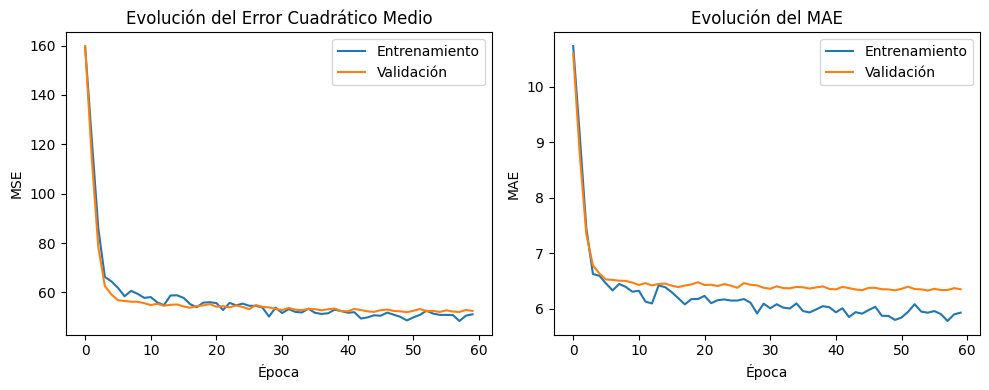

In [120]:
# 4.2 Visualización del entrenamiento (métricas por época)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Pérdida
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución del Error Cuadrático Medio')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='Entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='Validación')
plt.title('Evolución del MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


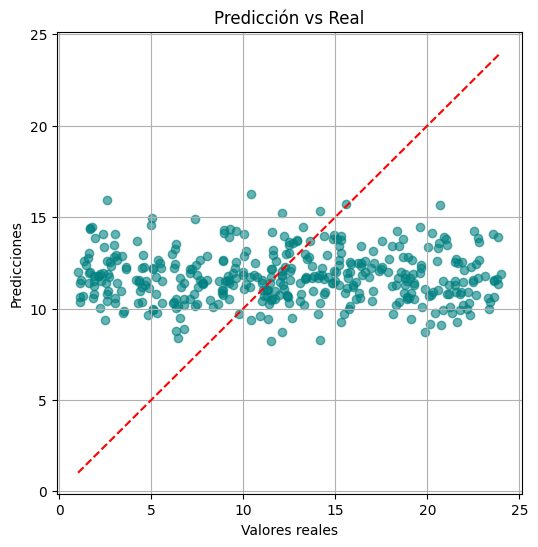

In [121]:
# 4.3 Visualizar predicciones vs reales
import numpy as np

# Predecir sobre test
y_pred = model.predict(X_test).flatten()

# Comparar
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Real')
plt.grid(True)
plt.show()


In [122]:
# Modelo 2: Random Forest Regressor – Mismos pasos que ANN
#  1. Entrenamiento del Modelo
# PASO 3: CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO Random Forest
import time
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
rf_model.fit(X_train, y_train)

end_time = time.time()
training_time_rf = end_time - start_time

print(f"⏱️ Tiempo de entrenamiento del modelo Random Forest: {training_time_rf:.2f} segundos")



⏱️ Tiempo de entrenamiento del modelo Random Forest: 2.91 segundos


In [123]:
!pip install joblib
import joblib
from google.colab import files

# Guardar el modelo entrenado
joblib.dump(rf_model, "modelo_random_forest.pkl")


files.download("modelo_random_forest.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
# 2. Evaluación del Modelo
# PASO 4: Evaluación del Modelo
# 4.1 Evaluación sobre test set
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predecir sobre conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Error absoluto medio (MAE): {mae_rf:.2f}")


Error cuadrático medio (MSE): 43.35
Error absoluto medio (MAE): 5.56


/tmp/ipython-input-125-3355797676.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


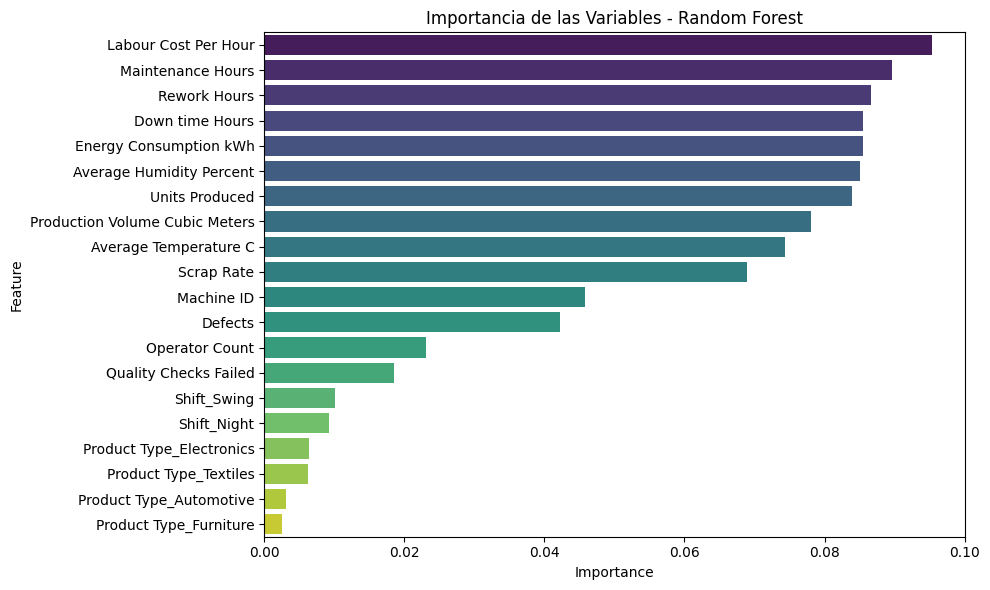

In [125]:
# 3. Visualización de Métricas (sin épocas, pero graficamos importancia)
# 4.2 Importancia de las variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Guarda los nombres antes de escalar
feature_names = X.columns  # X sigue siendo un DataFrame

# Luego al graficar la importancia:
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las Variables - Random Forest')
plt.tight_layout()
plt.show()


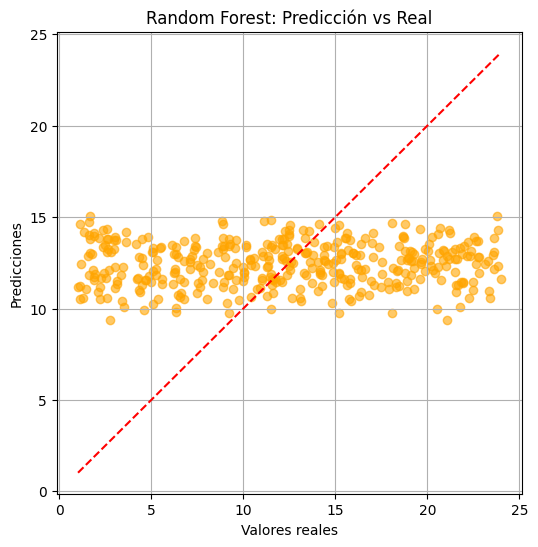

In [126]:
# 4. Visualización: Predicción vs Real
# 4.3 Visualizar predicciones vs reales
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest: Predicción vs Real')
plt.grid(True)
plt.show()


In [127]:
# Implementación paso a paso del modelo XGBoost (Regresión)
# Paso 1: Instalación (si no lo tienes ya)
import time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear el modelo
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

end_time = time.time()
training_time_xgb = end_time - start_time

print(f"⏱️ Tiempo de entrenamiento del modelo XGBoost: {training_time_xgb:.2f} segundos")


⏱️ Tiempo de entrenamiento del modelo XGBoost: 0.72 segundos


In [128]:
import csv

# Crear una lista de diccionarios con los resultados
tiempos_entrenamiento = [
    {"Modelo": "ANN", "Tiempo_Segundos": round(training_time, 2)},
    {"Modelo": "Random Forest", "Tiempo_Segundos": round(training_time_rf, 2)},
    {"Modelo": "XGBoost", "Tiempo_Segundos": round(training_time_xgb, 2)}
]

# Guardar en archivo CSV
csv_file = "tiempos_entrenamiento_modelos.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Modelo", "Tiempo_Segundos"])
    writer.writeheader()
    writer.writerows(tiempos_entrenamiento)

print(f"✅ Tiempos de entrenamiento guardados en: {csv_file}")


✅ Tiempos de entrenamiento guardados en: tiempos_entrenamiento_modelos.csv


In [129]:
# Guardar el modelo entrenado en formato JSON (recomendado por su portabilidad)
from google.colab import files
xgb_model.save_model("modelo_xgboost.json")



files.download("modelo_xgboost.json")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")


Error cuadrático medio (MSE): 47.92
Error absoluto medio (MAE): 5.76


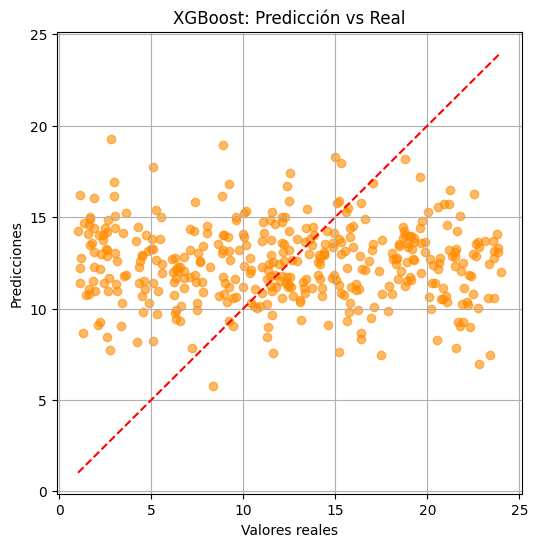

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('XGBoost: Predicción vs Real')
plt.grid(True)
plt.show()


/tmp/ipython-input-132-2304673777.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


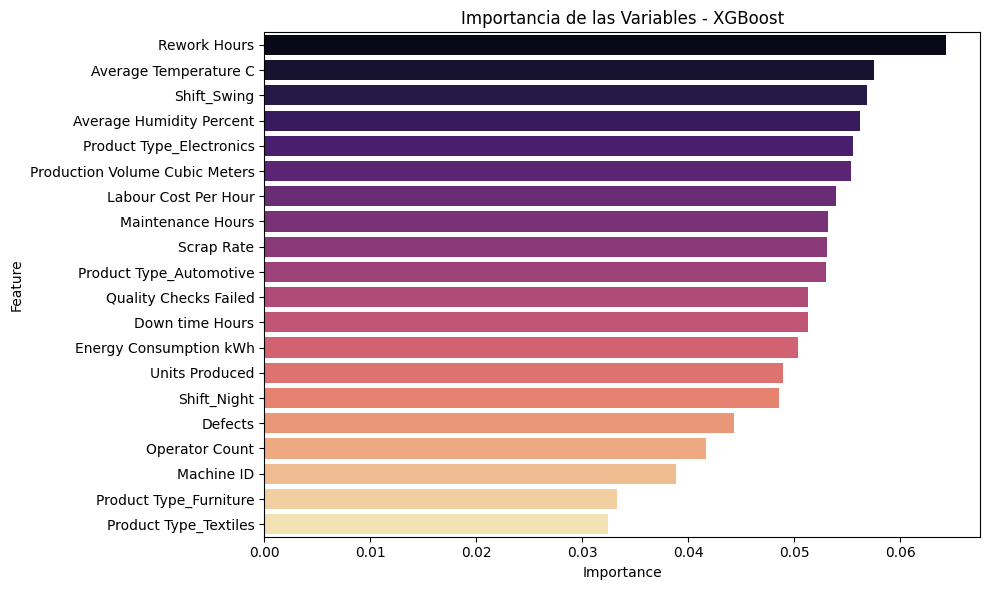

In [132]:
import pandas as pd
import seaborn as sns

# Obtener importancia
importance = xgb_model.feature_importances_
features = X.columns  # Aquí usamos las columnas originales

# DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Importancia de las Variables - XGBoost')
plt.tight_layout()
plt.show()


In [133]:
import joblib
from google.colab import files
joblib.dump(scaler, "scaler.pkl")

files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

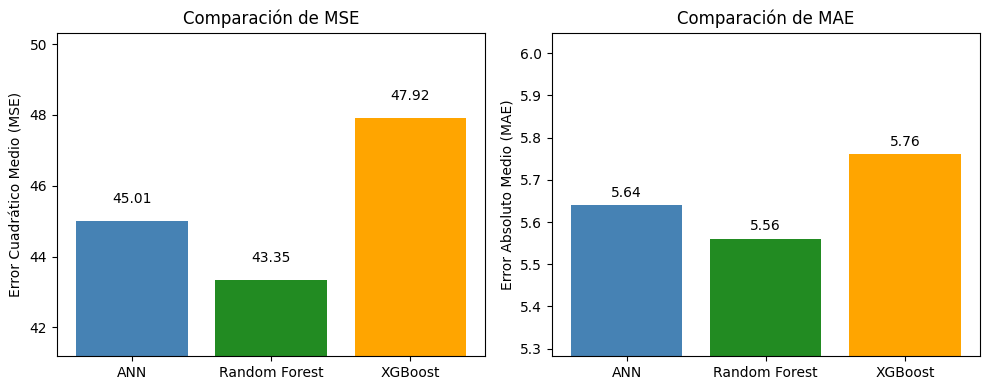

In [134]:
import matplotlib.pyplot as plt

# Métricas obtenidas de tus modelos (reemplaza con tus valores reales si son distintos)
modelos = ['ANN', 'Random Forest', 'XGBoost']
mse_vals = [45.01, 43.35, 47.92]
mae_vals = [5.64, 5.56, 5.76]

# -------- Gráfico 1: MSE ----------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(modelos, mse_vals, color=['steelblue', 'forestgreen', 'orange'])
plt.title('Comparación de MSE')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.ylim(min(mse_vals) * 0.95, max(mse_vals) * 1.05)
for i, v in enumerate(mse_vals):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center')

# -------- Gráfico 2: MAE ----------
plt.subplot(1,2,2)
plt.bar(modelos, mae_vals, color=['steelblue', 'forestgreen', 'orange'])
plt.title('Comparación de MAE')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.ylim(min(mae_vals) * 0.95, max(mae_vals) * 1.05)
for i, v in enumerate(mae_vals):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [135]:
import pandas as pd

# Crear el nuevo producto con los mismos nombres y orden de columnas
nuevo_producto = pd.DataFrame([{
    'Machine ID': 3,
    'Units Produced': 120,
    'Defects': 2,
    'Labour Cost Per Hour': 12.5,
    'Energy Consumption kWh': 220,
    'Operator Count': 4,
    'Maintenance Hours': 0.8,
    'Down time Hours': 1.2,
    'Production Volume Cubic Meters': 0.95,
    'Scrap Rate': 0.015,
    'Rework Hours': 0.5,
    'Quality Checks Failed': 1,
    'Average Temperature C': 23,
    'Average Humidity Percent': 58,
    'Product Type_Automotive': 0,
    'Product Type_Electronics': 1,
    'Product Type_Furniture': 0,
    'Product Type_Textiles': 0,
    'Shift_Night': 0,
    'Shift_Swing': 1
}])

# Reordenar columnas como en el entrenamiento
nuevo_producto = nuevo_producto[X.columns]

# Escalar el nuevo dato con el mismo scaler
nuevo_producto_scaled = scaler.transform(nuevo_producto)

# Hacer la predicción con el modelo entrenado
tiempo_estimado = rf_model.predict(nuevo_producto_scaled)

# Mostrar resultado
print(f"⏳ Tiempo estimado de producción: {tiempo_estimado[0]:.2f} horas")


⏳ Tiempo estimado de producción: 11.67 horas
